# パターン認識 第二週目 レポート課題

## レポートについて
＊レポートは配布資料(パターン認識_第2週目_資料.pdf)の「レポートの構成」にしたがってまとめてください。<br>
＊提出物は**レポート**と**課題を実装したjupyter notebookファイル(このファイル)**の二つです。

## レポート課題
課題の解をこのファイル(week2_report.ipynb)に実装してください。<br>課題ファイルにはコメント文でヒントが書かれていますが、必ずしもヒント通りに解く必要はありません（自由に実装していただいて構いません）。

In [7]:
#ライブラリのインポート
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

scikit-learnは、Pythonの機械学習ライブラリで、さまざまな学習用のライブラリが含まれています。その中には、いくつかのデータセットも用意されており、wineデータセットはその1つです。

wineデータセットは、3種類のワイン（クラス1、クラス2、クラス3）に関するデータセットです。データセットには、178サンプルが含まれており、それぞれに対し13の特徴と1つのクラスラベルを持っています。

scikit-learnのload_wine()関数を用いることで、ワインデータセットを読み込むことができます。

In [8]:
#データの読み込み
from sklearn.datasets import load_wine
data = load_wine()

In [9]:
#特徴量Xと目的変数y（正解ラベル）を作成
X = data.data
y = data.target

scikit-learnのtrain_test_split関数を用いることでデータセットを学習データとテストデータに分けることができます。

In [10]:
#ライブラリのインポート
from sklearn.model_selection import train_test_split

#学習データとテストデータに分割

#test_size: テストデータの割合, shuffle: データセットをシャッフルするかどうか, stratify: 指定したデータの比率を合わせる
#random_state: 乱数シードを指定
#X_train:学習データの値、X_test: テストデータの値、y_train: 学習データのラベル、y_test: テストデータのラベル
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y, random_state=54)
rows1, columns1 = X_train.shape
rows2, columns2 = X_test.shape
print(rows1, columns1)
print(rows2, columns2)
print(X_train[:10])
print(X_test)

124 13
54 13
[[1.269e+01 1.530e+00 2.260e+00 2.070e+01 8.000e+01 1.380e+00 1.460e+00
  5.800e-01 1.620e+00 3.050e+00 9.600e-01 2.060e+00 4.950e+02]
 [1.237e+01 1.630e+00 2.300e+00 2.450e+01 8.800e+01 2.220e+00 2.450e+00
  4.000e-01 1.900e+00 2.120e+00 8.900e-01 2.780e+00 3.420e+02]
 [1.251e+01 1.240e+00 2.250e+00 1.750e+01 8.500e+01 2.000e+00 5.800e-01
  6.000e-01 1.250e+00 5.450e+00 7.500e-01 1.510e+00 6.500e+02]
 [1.285e+01 3.270e+00 2.580e+00 2.200e+01 1.060e+02 1.650e+00 6.000e-01
  6.000e-01 9.600e-01 5.580e+00 8.700e-01 2.110e+00 5.700e+02]
 [1.345e+01 3.700e+00 2.600e+00 2.300e+01 1.110e+02 1.700e+00 9.200e-01
  4.300e-01 1.460e+00 1.068e+01 8.500e-01 1.560e+00 6.950e+02]
 [1.307e+01 1.500e+00 2.100e+00 1.550e+01 9.800e+01 2.400e+00 2.640e+00
  2.800e-01 1.370e+00 3.700e+00 1.180e+00 2.690e+00 1.020e+03]
 [1.358e+01 1.660e+00 2.360e+00 1.910e+01 1.060e+02 2.860e+00 3.190e+00
  2.200e-01 1.950e+00 6.900e+00 1.090e+00 2.880e+00 1.515e+03]
 [1.324e+01 3.980e+00 2.290e+00 1.750e+01 

上の3つのセル(データの読み込み、特徴量と目的変数の作成、学習データとテストデータに分割)は、**課題を解く前に必ず実行**してください。

## 課題1
kNNを実装してください。

参考としてkNNを実装する時に有用な関数の例を示します。実装においては必ずしもこの例に示した関数を使う必要はありません。


課題1～3は、**最大値の求め方**の下にあります。

## L2ノルムの求め方

numpyのlinalg.norm関数を使用することユークリッドノルムを求めることができます。

axis=0を指定すると、各列に対して計算され、axis=1を指定すると、各行に対して計算されます。

In [11]:
matrix = np.array([[1, 2, 3], 
                   [3, 4, 5]])

#axis=0を指定し、各列のL2ノルムを計算する
norm_columns = np.linalg.norm(matrix, axis=0)
print(norm_columns)  #出力: [3.16227766 4.47213595 5.83095189]

#axis=1を指定し、各行のL2ノルムを計算する
norm_rows = np.linalg.norm(matrix, axis=1)
print(norm_rows)  #出力: [3.74165739 7.07106781]

[3.16227766 4.47213595 5.83095189]
[3.74165739 7.07106781]


## ソートのやり方

numpyのargsort関数は、与えられたリストを昇順に並び変えた場合のインデックス（リストの何番目にあるか）を返します。

In [12]:
#配列vecを与える
vec = np.array([100, 23, 11, 90, 7])
#np.argsortでソートする
vec_sort_ind = np.argsort(vec)
#ソート結果の表示
vec_sorted = vec[vec_sort_ind]

#与えた配列の表示
print(f"与えた配列: {vec}")
#昇順に並び変えた場合のインデックス 7が一番小さいため0となる 出力: [4 2 1 3 0]
print(f"インデックス: {vec_sort_ind}") 
#与えた配列を昇順に並べる 出力: [  7  11  23  90 100]
print(f"与えた配列を昇順にソート: {vec_sorted}")

与えた配列: [100  23  11  90   7]
インデックス: [4 2 1 3 0]
与えた配列を昇順にソート: [  7  11  23  90 100]


## スライスの利用

スライスを利用することでデータの連続的部分や一部の抜き出しを行うことができます。

スライスの構文は以下の通りです。

[開始位置:終了位置:増分]

In [13]:
a = np.array([1, 2, 3, 4, 5, 6])

#インデックス(リストの何番目にあるか)0から3つ分リストから取り出す
print(a[0:3]) #出力: [1, 2, 3]

#0は省略が可能
print(a[:3]) #出力: [1, 2, 3]

#2つおきの要素
print(a[::2]) #出力: [1, 3, 5]

[1 2 3]
[1 2 3]
[1 3 5]


## 出現回数の求め方

numpyのnp.unique関数は、与えられたリストから重複する要素を削除し、ユニーク（一意）な要素を返します。

return_counts: Trueに設定すると、ユニークな要素の出現回数を返します。

In [14]:
u = np.array([30, 10, 30, 20, 40, 30, 50])
uni, fr = np.unique(u, return_counts=True)

#ユニークな値を返す
print(f"uni: {uni}") #出力: uni: [10 20 30 40 50]
#個数を返す
print(f"個数:{fr}") #出力: 個数:[1 1 3 1 1]

uni: [10 20 30 40 50]
個数:[1 1 3 1 1]


## 最大値の求め方

numpyのargmax関数は、最大値のインデックスを返します。

In [15]:
#出現回数のセルで定義したuni(ユニークな値), fr(個数)の配列を使用します
#個数の配列から最大値のインデックスを求める
u_max_ind = np.argmax(fr)

#個数の最大値インデックス(frの場合は0から開始して2番目)を出力
print(u_max_ind) #出力: 2
#ユニークな値の最大値を返す
print(uni[u_max_ind]) #出力: 30

2
30


## 課題1-1.
学習データとテストデータとのL2ノルムを計算してください。

In [16]:
#課題1-1:学習データとテストデータとのL2ノルムを計算します。
#np.linalg.normを用いる
def get_dist(X_train,X_test):
    
    dist = np.linalg.norm(X_train - X_test, axis=1)
    return dist #L2ノルムを返す

In [17]:
#実装結果をテスト
#各学習データとテストデータ1サンプルのL2ノルムを10個出力
print(get_dist(X_train,X_test[0])[:10]) #出力: [  32.55520235 ...

[  32.55520235  159.95907945  152.45350406   70.44572663  195.2440017
  520.20120665 1015.03242165  180.25164216  560.05190018   53.99136598]


## 課題1-2.
課題1-1で求めたL2ノルムを昇順にソートし、最も小さいものからk個(今回は5)のデータ点のクラスを調べてください。

In [18]:
#課題1-2: 求めたL2ノルムを昇順にソートし、最も小さいk個(今回は5)のデータを求め、そのクラスを調べてください。
#np.argsort, スライスを用いる
def get_knn_classes(y_train,dist,k):
    ##ここに実装
    #求めたL2ノルムを昇順にソート
    vec_sort = np.argsort(dist)
    #最も小さいものからk個のデータ点のクラスを調べる
    #ヒント1: y_train(学習データのクラスをもつ配列)を使用します
    
    knn_class = y_train[vec_sort[:k]]
    return knn_class #クラスを返す

In [19]:
#実装結果をテスト
k = 5

#結果を10個出力
for x_test in X_test[:10]:
    dist=get_dist(X_train,x_test)
    s_idx = get_knn_classes(y_train, dist, 5)
    print(s_idx) #出力: [2 2 2 1 1].....

[2 2 2 1 1]
[2 1 1 1 2]
[2 2 2 1 2]
[1 1 1 1 1]
[1 1 1 1 1]
[0 0 1 0 0]
[1 1 2 1 1]
[1 2 2 2 1]
[1 1 1 1 2]
[0 0 0 0 0]


## 課題1-3.
課題1-2で求めた5個のクラスの中で、最も多く現れるクラスを求めてください。

In [23]:
#課題1-3:課題1-2で求めた5個のデータ点の中で、最も多く現れるクラスを求める
#np.unique, np.argmaxを用いる
def get_class(knn_class):
    ##ここに実装
    uni, fr = np.unique(knn_class, return_counts=True)
    pred = uni[np.argmax(fr)]
    return pred #最も多く現れるクラスを返す

In [24]:
#実装結果をテスト
k = 5

#結果を10個出力
for x_test in X_test[:10]:
    dist=get_dist(X_train,x_test)
    s_idx = get_knn_classes(y_train, dist, k)
    pred_class = get_class(s_idx)
    print(pred_class) #出力: 2,1,2,1...

2
1
2
1
1
0
1
2
1
0


課題1-1~1-3を用いてkNNを実装します。

In [25]:
def knn_classify(X_train, y_train, x_test, k):
    #課題1-1~1-3を埋めると正解率が表示されます
    dist = get_dist(X_train,x_test)
    sort_idx = get_knn_classes(y_train, dist, k)
    y_pred = get_class(sort_idx)
    
    return y_pred

from sklearn.metrics import accuracy_score

k = 3

y_pred = [knn_classify(X_train, y_train, x_test, k) for x_test in X_test]

#正解率を求める
score = accuracy_score(y_test, y_pred)
print(f"Accuracy: {score}")

Accuracy: 0.6666666666666666


## 課題2

$k$の値を1から100までの数に変更し、kNNを実行してください。

$k$ごとの結果をグラフへ描画し、また最も正解率が高くなるときの$k$(候補が複数ある場合は、$k$が最小のもの)と正解率を表示してください。

In [26]:
#kの値を1から100までの数に定める
k_range = range(1, 101)

#各kの正解率を入れる配列
accuracy_2 = []

#kを1から100まで動かし、それぞれの正解率を求める
#ヒント1：appeendを使うと、配列に要素を追加できる
for k in k_range:
    y_pred = [knn_classify(X_train, y_train, x_test, k) for x_test in X_test]
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_2.append(accuracy)

In [29]:
#正解率が最大となるkを求める関数
def find_k(accuracy):
    #正解率が最大となるkのインデックスを取得
    
    #求めたkとその時の正解率を表示する
    return np.argmax(accuracy)+1, np.max(accuracy)

In [30]:
#正解率が最大となるkを求める
find_k(accuracy_2)

(20, 0.8148148148148148)

In [31]:
def show_graph(accuracy):
    #各kに対するAccuracyを折れ線グラフとしてプロット
    fig, ax = plt.subplots(figsize=(8,6))
    ax.plot(k_range, accuracy)
    ax.set_xlabel('Number of Neighbors K', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)

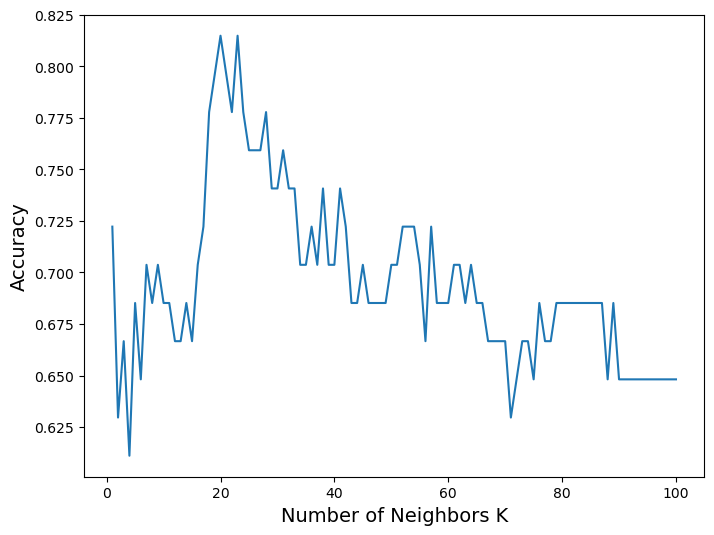

In [32]:
#グラフを表示
show_graph(accuracy_2)

## 課題3
標準正規化を行ってから課題2と同様の実験を行ってください。

標準正規化は以下の式で求められます。
$$\bar{x} = \frac{x - x_{mean}}{\sigma_{x}}$$

$$x_{mean}: 平均$$
$$ \sigma_{x}: 標準偏差$$ 

numpyのmean関数を用いることで平均が、std関数を用いることで標準偏差を求めることできます。

テストデータを標準化する際は、**学習データの平均と標準偏差**を用いて行うようにしてください。

In [33]:
#学習データの平均を求める（ヒント：mean関数を使う、axisを指定する)
X_train_a=np.mean(X_train,axis=0)
#学習データの標準偏差を求める（ヒント：std関数を使う、axisを指定する）
X_train_std=np.std(X_train,axis=0)
#学習データを標準正規化する
X_train_stn = (X_train - X_train_a) / X_train_std
#テストデータを標準正規化する
X_test_stn = (X_test - X_train_a) / X_train_std

In [34]:
#kの値を1から100までの数に定める
k_range = range(1, 101)

#各kの正解率を入れる配列
accuracy_3 = []

#kを1から100まで動かし、それぞれの正解率を求める
#ヒント1：appeendを使うと、配列に要素を追加できる
for k in k_range:
    #課題2と同様に実装
    y_pred = [knn_classify(X_train_stn, y_train, x_test_stn, k) for x_test_stn in X_test_stn]
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_3.append(accuracy)

In [35]:
#正解率が最大となるkを求める
find_k(accuracy_3)

(7, 0.9814814814814815)

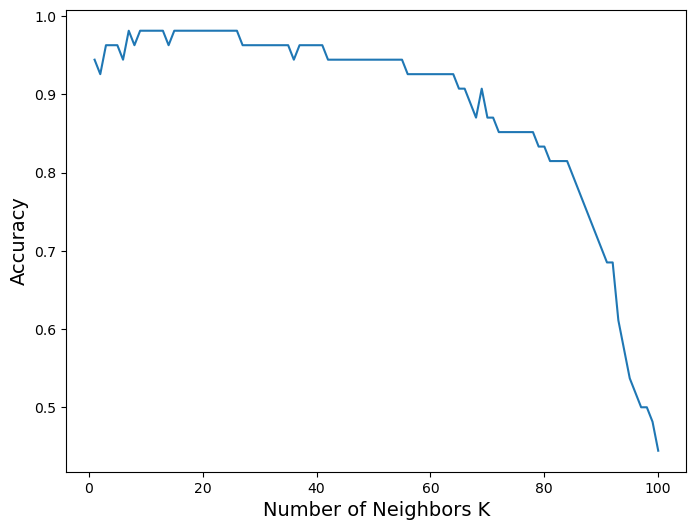

In [36]:
#グラフを表示
show_graph(accuracy_3)

## 課題 4.A
$k$の値を大きくしても正解率が向上するとは限らないとは何故か、その理由について考察してください。

## 課題 4.B
標準正規化を行う場合と行わない場合の正解率を比較して、その差がどうして生まれるか考察してください。